In [1]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.1 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=d3d7c31cedc83d4b9017477896728efbbcf5579925983b0e0e4b70453dc02b3b
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

In [3]:
df_train = pd.read_excel("/kaggle/input/ubmec-clean/ubmec_clean.xlsx")

In [4]:
df_train.head()

,text,classes
0,এই নাটকটি হচ্ছে এই সালের। কিন্তু তখন ইউটিউবে ছ...,joy
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ...,surprise
2,""" বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক "" "" কোথ...",joy
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সাল...",joy
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দ...,surprise


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

3612


In [7]:
df_train['classes'].value_counts()

classes
joy         3467
sadness     2683
anger       2480
disgust     2079
surprise    1366
fear        1361
Name: count, dtype: int64

In [8]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=True,
   remove_number=True,
   remove_digits=True,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

In [9]:
df_train['text'] = df_train['text'].apply(clean_text)

In [10]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(df_train['text'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00004 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
0000000             0.000036
03                  0.000024
11                  0.000027
1101826526522067    0.000028
12                  0.000011
                      ...   
ৰণ                  0.000007
ৰথম                 0.000032
ৰৱ                  0.000040
ৱচ                  0.000032
৷কর                 0.000040
Length: 1483, dtype: float64


In [11]:
# Function to remove less important words
def remove_less_important_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)


In [12]:
df_train['text'] = df_train['text'].apply(remove_less_important_words)

In [13]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

3303


In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2,stratify=df_train['classes'],random_state=42)

In [15]:
X_train  =  train_df['text'].values.tolist()
y_train = train_df['classes'].tolist()

In [16]:
X_test =  test_df['text'].values.tolist()
y_test = test_df['classes'].tolist()

In [17]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 62.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 10.4 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=351da9c24bbe4e9d939ef9ce6e53c911c96ecf3a5b8788578b340194e083a6f7
  Stored in directory: /roo

In [18]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [19]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 19
	95percentile : 42
	99percentile : 77


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 19
	95percentile : 45
	99percentile : 79


In [20]:
print(trn)

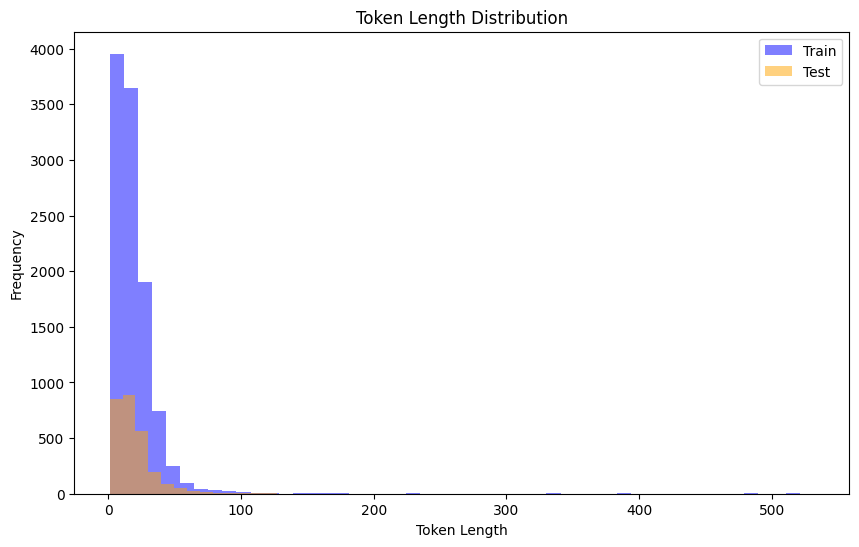

In [21]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [22]:
model = t.get_classifier()

In [23]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [24]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [25]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1344/1344 [==============================] - 854s 616ms/step - loss: 1.5920 - accuracy: 0.3458 - val_loss: 1.4033 - val_accuracy: 0.4609
Epoch 2/10
1344/1344 [==============================] - 823s 612ms/step - loss: 1.3159 - accuracy: 0.4955 - val_loss: 1.2926 - val_accuracy: 0.5033
Epoch 3/10
1344/1344 [==============================] - 823s 612ms/step - loss: 1.1634 - accuracy: 0.5647 - val_loss: 1.2885 - val_accuracy: 0.5093
Epoch 4/10
1344/1344 [==============================] - 823s 612ms/step - loss: 1.0246 - accuracy: 0.6227 - val_loss: 1.2616 - val_accuracy: 0.5435
Epoch 5/10
1344/1344 [==============================] - 823s 612ms/step - loss: 0.8976 - accuracy: 0.6710 - val_loss: 1.3548 - val_accuracy: 0.5379
Epoch 6/10
1344/1344 [==============================] - 823s 612ms/step - loss: 0.7308 - accuracy: 0.7323 - val_loss: 1.3943 - val_accuracy: 0.5301
Epoch 7/10
1344/1344 [===========================

In [26]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [27]:
classes=t.get_classes()

In [28]:
cm = learner.validate(class_names=t.get_classes())

84/84 [==============================] - 60s 674ms/step
              precision    recall  f1-score   support

       anger       0.54      0.51      0.53       496
     disgust       0.39      0.35      0.37       416
        fear       0.63      0.63      0.63       272
         joy       0.71      0.70      0.71       694
     sadness       0.46      0.50      0.48       537
    surprise       0.39      0.40      0.40       273

    accuracy                           0.54      2688
   macro avg       0.52      0.52      0.52      2688
weighted avg       0.54      0.54      0.54      2688



In [29]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [30]:
!zip -r mental.zip /kaggle/output/mental-health-rand

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/mental-health-rand

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/mental-health-rand)


In [31]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [32]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [33]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")